Пик пропускания находится в точке x = 193553.0930967742 ГГц


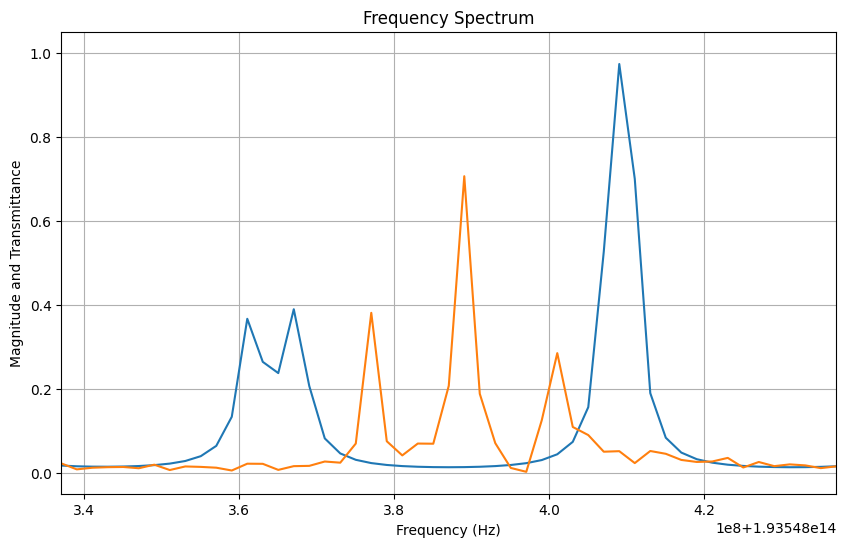

In [9]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
import pandas as pd
from scipy.signal import find_peaks

df = pd.read_csv('praktik6.csv')
spectr1 = np.array(df.iloc[:,0])
Spectr1 = np.array(df.iloc[:,1])
dt = spectr1[1] - spectr1[0]
fft_signal = np.fft.fft(Spectr1)
fft_signal = fft_signal[:len(fft_signal)//2-1]
freq = np.fft.fftfreq(len(Spectr1), d = dt)
freq = freq[freq>0]
fft_signal_norm = abs(fft_signal)/max(abs(fft_signal))
c= 3e8
h = 1550e-9
f_Er = c/h
freq = freq - 80e6 + c/h

'''FSR = 334.5e6
print(FSR)
c = 3e8
n = 1.46
l = 7 * c / (n  * FSR)
print(l)
N = 7
M = 8
L = M/N * l
print(L)'''

k1 = k3 = 0.25
k2 = 0.032
l = 4.300018
L = 4.914307
n = 1.46
c = 3e8
T1 = n*l/c
T2 = n*L/c
α = 0.00018
γ1 = np.exp(-α * l)
γ2 = np.exp(-α * L)
N = 7
M = 8
C1 = np.sqrt(1-k1)
C2 = np.sqrt(1-k2)
C3 = np.sqrt(1-k3)
def t_filter_first(w):
    z = np.exp(1j*w*2*np.pi*T1/N)
    return  (1j * np.sqrt(γ1 * γ2 * k1 * k2 * k3) * np.sqrt(z**(-(N + M))))/(1 - C1 * C2 * γ1 * z**(-N) - C2 * C3 * γ2 * z**(-M)\
        + C1 * C3 * γ1 * γ2 * z**(-(N + M)))
def T_filter_first(freq):
    result = []
    for w in freq:
        value = t_filter_first(w)
        result.append(value)
    return np.array(result)
T_values = np.abs(T_filter_first(freq))

peaks, _ = find_peaks(T_values)
'''def min_range(freq):
    range_peaks = []
    range_peaks_freq = []
    for i in range(len(freq[peaks])-1):
        range_peaks.append(freq[peaks][i] -  (c/h + 2.0e6))
        range_peaks_freq.append(freq[peaks[i]])
    for i in range(len(range_peaks)):
        if range_peaks[i] == min(range_peaks):
            return range_peaks_freq[i]
max_x_value = min_range(freq)'''
max_peak_index = peaks[np.argmax(T_values[peaks])]
# Значение по оси x для максимального пика
max_x_value = freq[max_peak_index]
print(f'Пик пропускания находится в точке x = {max_x_value/1e9} ГГц')
#print(max_x_value - (c/h + 2.0e6))

plt.figure(figsize = (10,6))
plt.plot(freq, T_values)
plt.xlim(c/h - 50e6 , c/h + 50e6)
plt.plot(freq, np.abs(fft_signal_norm))
#plt.axvline(x = c/h + 2.0e6, color = 'red')
#plt.axvline(x = max_x_value  , color = 'red')
#plt.axvline(x = max_x_value + 3.5e6, color = 'red')
#plt.axvline(x = max_x_value - 2e6, color = 'red')
#plt.xticks(np.arange(min(freq) , max(freq), 50e7))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude and Transmittance')
plt.title('Frequency Spectrum')
plt.grid()
#plt.tight_layout()
plt.show()
  


In [1]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
import pandas as pd
from scipy.signal import find_peaks

df = pd.read_csv('praktik6.csv')
spectr1 = np.array(df.iloc[:,0])
Spectr1 = np.array(df.iloc[:,1])
dt = spectr1[1] - spectr1[0]
fft_signal = np.fft.fft(Spectr1)
fft_signal = fft_signal[:len(fft_signal)//2-1]
freq = np.fft.fftfreq(len(Spectr1), d = dt)
freq = freq[freq>0]
fft_signal_norm = abs(fft_signal)/max(abs(fft_signal))\

c= 3e8
h = 1550e-9
f_Er = c/h
freq = freq - 80e6 + c/h

def a(FSR):
    #FSR = 800e6
    n = 1.46
    l = 7 * c / (n  * FSR)
    N = 7
    M = 8
    L = M/N * l
    k1 = k3 = 0.25
    k2 = 0.032
    T1 = n*l/c
    T2 = n*L/c
    α = 0.000001
    γ1 = np.exp(-α * l)
    γ2 = np.exp(-α * L)
    C1 = np.sqrt(1-k1)
    C2 = np.sqrt(1-k2)
    C3 = np.sqrt(1-k3)
    def t_filter_first(w):
        z = np.exp(1j*w*2*np.pi*T1/N)
        return  (1j * np.sqrt(γ1 * γ2 * k1 * k2 * k3) * np.sqrt(z**(-(N + M))))/(1 - C1 * C2 * γ1 * z**(-N) - C2 * C3 * γ2 * z**(-M)\
            + C1 * C3 * γ1 * γ2 * z**(-(N + M)))
    def T_filter_first(freq):
        result = []
        for w in freq:
            value = t_filter_first(w)
            result.append(value)
        return np.array(result)
    T_values = np.abs(T_filter_first(freq))
    peaks, _ = find_peaks(T_values)
    max_peak_index = peaks[np.argmax(T_values[peaks])]
# Значение по оси x для максимального пика
    max_x_value = freq[max_peak_index]
    return max_x_value
def b(freq):
    FSR = 1000e6
    while abs((a(FSR)  - (c/h + 2e6))) > 1e6:
        FSR-=0.5e6
    return FSR
print(b(freq)/1e6)

334.5


In [ ]:
FSR = 10e9 - 1610000000.0/2
c = 3e8
n = 1.46
l = 7 * c / (n  * FSR)
print(l)
N = 7
M = 8
L = M/N * l
print(L)


0.1564280766050638
0.1787749446915015
